# Set up

In [31]:
import requests
import json, os

nn_id = 'nn793982'  # put some key value you want to test

url = "{0}:{1}".format(os.environ['HOSTNAME'] , "8000")
print("done")

done


# Net & Version Create

In [32]:
####(1) 네트워크 생성 ####
resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/' + nn_id + '/',
                     json={
                         "biz_cate": "MES",
                         "biz_sub_cate": "M60",
                         "nn_title" : "test",
                         "nn_desc": "test desc",
                         "use_flag" : "Y",
                         "dir": "purpose?",
                         "config": "N"
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

####(2) 버전 생성 ####
resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/' + nn_id + '/version/',
                 json={
                     "nn_def_list_info_nn_id": "",
                     "nn_wf_ver_info": "test version info",
                     "condition": "1",
                     "active_flag": "Y"
                 })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))


evaluation result : nn793982
evaluation result : nn793982


# Graph Flow 정의
CSV 데이터를 AutoEncoder 에 훈련시키는 Graph Flow 정의, Eval Node 는 정의하지 않음. 

In [33]:
# Work Flow 틀을 구성하도로고 지시한다. (정해진 틀을 강제로 생성)
resp = requests.post('http://' + url + '/api/v1/type/wf/target/init/mode/simple/' + nn_id +'/wfver/1/',
                     json={
                         "type": 'autoencoder_csv'
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : autoencoder_csv


# CSV Data Upload 
한글 CSV 데이터를 업로드 한다. 

In [34]:
return_dict = {}
return_dict['test'] = open('../../data/mes.csv', 'rb')

resp = requests.post('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/datasrc/',
                     files = return_dict)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : ['1 file upload success']


# Data Node 정의
데이터 처리에 관한 정의 CSV 파일을 Pandas 를 통해서 읽고 HDF5 로 변환, 별도의 전처리는 지정하지 않음 

In [35]:
# (1) Train Data Node 의 속성을 정의
# 어디서 Source 를 어떻게 가지고 올것인지 파라메터 정의 
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/datasrc/',
                     json={
                         "type": "csv",
                         "source_server": "local",
                         "source_sql": "all",
                     })

# 전처리는 어떤 것을 할지 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/pre/nnid/'+nn_id+'/ver/1/node/datasrc/',
                      json={
                          "preprocess":  "none",
                      })
# 전처리가 완료된 데이터는 어디에 저장을 할지 
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/store/nnid/'+nn_id+'/ver/1/node/datasrc/',)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : /hoya_str_root/nn793982/1/datasrc


# Data Feeder 
Network 에서 훈련을 위해 원하는 형태로 데이터를 편집하여 제공하는 기능 수행 

In [36]:
# (2) Network 에 데이터를 Feed하는 Node 의 속성을 정의 
resp = requests.post('http://' + url + '/api/v1/type/wf/state/pre/detail/feed/src/frame/net/autoencoder/nnid/'+nn_id+'/ver/1/node/feed_train/',
                     json={                   
                         "encode_column" : ["PRODUCT_CD","CUR_FAC_OP_CD","MC_NO","CAST_STR_NUM","SM_STEEL_GRD","CC_UNCOND_SF_MTH","CUR_HCR_TP","QA_TRK_ACT_CODE","SL_QTRACK_OCR_CD","SPECIFICATION_CD","UNCOND_SLAB_ASS_FLAG","CC_CSTP_COOL_TYPE","CTL_INDI_HCR_TP","DESN_SRF_INDI","C_ST_CONST_B_RST","C_ST_CONST_C_RST","C_ST_CONST_CA_RST","C_ST_CONST_CEQ_RST","C_ST_CONST_CR_RST","C_ST_CONST_CU_RST","C_ST_CONST_MN_RST","C_ST_CONST_MO_RST","C_ST_CONST_N_RST","C_ST_CONST_NB_RST","C_ST_CONST_NI_RST","C_ST_CONST_P_RST","C_ST_CONST_S_RST","C_ST_CONST_SI_RST","C_ST_CONST_SOL_AL_RST","C_ST_CONST_TI_RST","C_ST_CONST_TOT_AL_RST","C_ST_CONST_V_RST","BF_NUM1","BF_NUM2","CH_IR_CALC_S","CAST_CAST_SPD_CNG_QT","CASTING_AVG_SPEED","CASTING_MAX_SPEED","CASTING_MIN_SPEED","CC_2ND_C_WTR_RETE_TM","EMLA_LS_LEFT_FREQ","EMLA_LS_LEFT_ISIDE_E_CUR_V","EMLA_LS_LEFT_OSD_E_CUR_V","EMLA_LS_RGT_FREQ","EMLA_LS_RGT_ISIDE_E_CUR_V","EMLA_LS_RGT_OSD_E_CUR_V","EMS_USE_F","L_MLD_TAPR_RATE","LIGHT_ROLL_FLAG","MLAC_10MM_OV_TIM","MLAC_20MM_OV_TIM","MLAC_3MM_OV_TIM","MLAC_5MM_OV_TIM","MLD_LON_ISIDE_C_WTR_TM_TIM","MLD_LON_OSD_C_WTR_TM_TIM","MLD_M_MAT_SUR_VAR_W_MAX_V","MLD_SOT_LEFT_C_WTR_TM_TIM","MLD_SOT_RGT_C_WTR_TM_TIM","RMLD_TAPR_LEFT_CNG_QT","MLD_TAPR_RGT_CNG_QT","MLD_VIBRA_W","R_MLD_TAPR_RATE","SETT_NOZ_SETTLE_DTH_AV_V","SETT_NOZ_SETTLE_DTH_MAX_V","SETT_NOZ_SETTLE_DTH_MI_V","SHRO_NOZ_SETTLE_DTH_AV_V","SHRO_NOZ_SETTLE_DTH_MAX_V","SHRO_NOZ_SETTLE_DTH_MI_V","SM_CC_MD_MX_CASPD_OFFC_LOC","SM_CC_MD_MX_CNG_CAST_SPD","SM_CC_MD_MXML_VAR_OFFC_LOC","SM_CC_MD_MXML_VAR_QT","SM_CCM_BD_AV_CAST_SPD","SM_CCM_BD_MN_CAST_SPD","SM_CCM_BD_MX_CAST_SPD","SM_CCM_CBW_AV_CAST_SPD","SM_CCM_CBW_MN_CAST_SPD","SM_CCM_CBW_MX_CAST_SPD","SM_CCM_UBD_AV_CAST_SPD","SM_CCM_UBD_MN_CAST_SPD","SM_CCM_UBD_MX_CAST_SPD","SM_CCM_UBD_ST_AV_CAST_SPD","SM_CCM_UBD_ST_MN_CAST_SPD","SM_CCM_UBD_ST_MX_CAST_SPD","TUND_M_STE_OVRH_DGR","TUND_NOZ_AC_POURING_QT","TUND_NOZ_CAL_POURING_QT","TUND_NOZ_CLOSE_X","TUND_SETT_NOZ_AR_AV_FLOW_QT","TUND_SETT_NOZ_AR_AV_OILP","TUND_SETT_NOZ_AR_MAX_FLOW_QT","TUND_SETT_NOZ_AR_MAX_OILP","TUND_SETT_NOZ_AR_MI_FLOW_QT","TUND_SETT_NOZ_AR_MI_OILP","TUND_SLIDGTE_OPEN_H_QT","TUNDISH_SLID_NOZ_MAX_OPEN_H","TUNDISH_SLID_NOZ_MI_OPEN_H","TUNDISH_SLID_NOZ_OPEN_H_VAR_RT","TUNDISH_AVG_TEMP","UNCOND_SLAB_LTH","UNCOND_SLAB_THK","UNCOND_SLAB_WGT","UNCOND_SLAB_WTH","CH_LADEL_SLAG_RPR_QT","CH_LAD_USE_TIM","CH_CPR","C_ST_CONST_SN_RST","C_ST_CONST_ZN_RST","SCR_T_CH_QT","CAST_LAD_M_STE_QT","SM_CC_LDOP_INSAT_CST_HD_POS","SHRO_NOZ_AR_MAX_OILP","TUND_UP_NOZ_AR_MAX_OILP","CH_IR_CALC_MN","SM_CC_LDOP_INDN_CST_HD_POS","TUND_UP_NOZ_AR_MI_OILP","SM_CC_LD_SN_RP_CSTP_HD_POS","SHRO_NOZ_AR_MI_OILP","TUND_UP_NOZ_AR_MI_FLOW_QT","SHRO_NOZ_AR_MAX_FLOW_QT","C_ST_CONST_ZR_RST","CH_HMR","CH_IR_QT","MLD_SOT_LEFT_C_QT","RH_CHARGE_T_VACCUM_PRC_TM","TUND_UP_NOZ_AR_AV_FLOW_QT","SM_OP_CAST_MD_INJ_CSTP_QT1","SM_CC_DEF_FST_RST_TP","SLAB_SUR_MAIN_DEF_CD2"],
                         "vocab_size" : 10,
                         "preprocess": "frame",
                         "embed_type" : 'onehot'
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : {'encode_column': ['PRODUCT_CD', 'CUR_FAC_OP_CD', 'MC_NO', 'CAST_STR_NUM', 'SM_STEEL_GRD', 'CC_UNCOND_SF_MTH', 'CUR_HCR_TP', 'QA_TRK_ACT_CODE', 'SL_QTRACK_OCR_CD', 'SPECIFICATION_CD', 'UNCOND_SLAB_ASS_FLAG', 'CC_CSTP_COOL_TYPE', 'CTL_INDI_HCR_TP', 'DESN_SRF_INDI', 'C_ST_CONST_B_RST', 'C_ST_CONST_C_RST', 'C_ST_CONST_CA_RST', 'C_ST_CONST_CEQ_RST', 'C_ST_CONST_CR_RST', 'C_ST_CONST_CU_RST', 'C_ST_CONST_MN_RST', 'C_ST_CONST_MO_RST', 'C_ST_CONST_N_RST', 'C_ST_CONST_NB_RST', 'C_ST_CONST_NI_RST', 'C_ST_CONST_P_RST', 'C_ST_CONST_S_RST', 'C_ST_CONST_SI_RST', 'C_ST_CONST_SOL_AL_RST', 'C_ST_CONST_TI_RST', 'C_ST_CONST_TOT_AL_RST', 'C_ST_CONST_V_RST', 'BF_NUM1', 'BF_NUM2', 'CH_IR_CALC_S', 'CAST_CAST_SPD_CNG_QT', 'CASTING_AVG_SPEED', 'CASTING_MAX_SPEED', 'CASTING_MIN_SPEED', 'CC_2ND_C_WTR_RETE_TM', 'EMLA_LS_LEFT_FREQ', 'EMLA_LS_LEFT_ISIDE_E_CUR_V', 'EMLA_LS_LEFT_OSD_E_CUR_V', 'EMLA_LS_RGT_FREQ', 'EMLA_LS_RGT_ISIDE_E_CUR_V', 'EMLA_LS_RGT_OSD_E_CUR_V', 'EMS_USE_F', 'L_MLD_TAPR_RATE'

# AutoEncoder 정의 
n_hidden 의 경우 Encoder 부만 정의하면 Decoder부는 동일한 Vector 를 Revsere로 활용하도록 되어 있다. 

In [37]:
resp = requests.put('http://' + url + '/api/v1/type/wf/state/netconf/detail/autoencoder/nnid/' + nn_id + '/ver/1/node/netconf_node/',
                     json={
                        "learning_rate" : 0.01,
                        "iter" : 10,
                        "batch_size" : 5,
                        "examples_to_show" : 10,
                        "n_hidden" : [200, 100] 
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : {'n_hidden': [200, 100], 'model_path': '/hoya_model_root/nn793982/1/netconf_node', 'examples_to_show': 10, 'iter': 10, 'batch_size': 5, 'learning_rate': 0.01}


# Eval Process Set

In [38]:
return_dict = {}
return_dict['test'] = open('../../data/mes.csv', 'rb')

resp = requests.post('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/evaldata/',
                     files = return_dict)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

# 데이터 - 소스 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/evaldata/',
                     json={
                         "type": "csv",
                         "source_server": "local",
                         "source_sql": "all",
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

# 데이터 - 전처리 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/pre/nnid/'+nn_id+'/ver/1/node/evaldata/',
                      json={
                          "preprocess":  "none",
                      })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

# 데이터 - 저장 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/store/nnid/'+nn_id+'/ver/1/node/evaldata/',)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))


# Feeder 정의
resp = requests.post('http://' + url + '/api/v1/type/wf/state/pre/detail/feed/src/frame/net/autoencoder/nnid/'+nn_id+'/ver/1/node/feed_test/',
                     json={
                         "encode_column" : ["PRODUCT_CD","CUR_FAC_OP_CD","MC_NO","CAST_STR_NUM","SM_STEEL_GRD","CC_UNCOND_SF_MTH","CUR_HCR_TP","QA_TRK_ACT_CODE","SL_QTRACK_OCR_CD","SPECIFICATION_CD","UNCOND_SLAB_ASS_FLAG","CC_CSTP_COOL_TYPE","CTL_INDI_HCR_TP","DESN_SRF_INDI","C_ST_CONST_B_RST","C_ST_CONST_C_RST","C_ST_CONST_CA_RST","C_ST_CONST_CEQ_RST","C_ST_CONST_CR_RST","C_ST_CONST_CU_RST","C_ST_CONST_MN_RST","C_ST_CONST_MO_RST","C_ST_CONST_N_RST","C_ST_CONST_NB_RST","C_ST_CONST_NI_RST","C_ST_CONST_P_RST","C_ST_CONST_S_RST","C_ST_CONST_SI_RST","C_ST_CONST_SOL_AL_RST","C_ST_CONST_TI_RST","C_ST_CONST_TOT_AL_RST","C_ST_CONST_V_RST","BF_NUM1","BF_NUM2","CH_IR_CALC_S","CAST_CAST_SPD_CNG_QT","CASTING_AVG_SPEED","CASTING_MAX_SPEED","CASTING_MIN_SPEED","CC_2ND_C_WTR_RETE_TM","EMLA_LS_LEFT_FREQ","EMLA_LS_LEFT_ISIDE_E_CUR_V","EMLA_LS_LEFT_OSD_E_CUR_V","EMLA_LS_RGT_FREQ","EMLA_LS_RGT_ISIDE_E_CUR_V","EMLA_LS_RGT_OSD_E_CUR_V","EMS_USE_F","L_MLD_TAPR_RATE","LIGHT_ROLL_FLAG","MLAC_10MM_OV_TIM","MLAC_20MM_OV_TIM","MLAC_3MM_OV_TIM","MLAC_5MM_OV_TIM","MLD_LON_ISIDE_C_WTR_TM_TIM","MLD_LON_OSD_C_WTR_TM_TIM","MLD_M_MAT_SUR_VAR_W_MAX_V","MLD_SOT_LEFT_C_WTR_TM_TIM","MLD_SOT_RGT_C_WTR_TM_TIM","RMLD_TAPR_LEFT_CNG_QT","MLD_TAPR_RGT_CNG_QT","MLD_VIBRA_W","R_MLD_TAPR_RATE","SETT_NOZ_SETTLE_DTH_AV_V","SETT_NOZ_SETTLE_DTH_MAX_V","SETT_NOZ_SETTLE_DTH_MI_V","SHRO_NOZ_SETTLE_DTH_AV_V","SHRO_NOZ_SETTLE_DTH_MAX_V","SHRO_NOZ_SETTLE_DTH_MI_V","SM_CC_MD_MX_CASPD_OFFC_LOC","SM_CC_MD_MX_CNG_CAST_SPD","SM_CC_MD_MXML_VAR_OFFC_LOC","SM_CC_MD_MXML_VAR_QT","SM_CCM_BD_AV_CAST_SPD","SM_CCM_BD_MN_CAST_SPD","SM_CCM_BD_MX_CAST_SPD","SM_CCM_CBW_AV_CAST_SPD","SM_CCM_CBW_MN_CAST_SPD","SM_CCM_CBW_MX_CAST_SPD","SM_CCM_UBD_AV_CAST_SPD","SM_CCM_UBD_MN_CAST_SPD","SM_CCM_UBD_MX_CAST_SPD","SM_CCM_UBD_ST_AV_CAST_SPD","SM_CCM_UBD_ST_MN_CAST_SPD","SM_CCM_UBD_ST_MX_CAST_SPD","TUND_M_STE_OVRH_DGR","TUND_NOZ_AC_POURING_QT","TUND_NOZ_CAL_POURING_QT","TUND_NOZ_CLOSE_X","TUND_SETT_NOZ_AR_AV_FLOW_QT","TUND_SETT_NOZ_AR_AV_OILP","TUND_SETT_NOZ_AR_MAX_FLOW_QT","TUND_SETT_NOZ_AR_MAX_OILP","TUND_SETT_NOZ_AR_MI_FLOW_QT","TUND_SETT_NOZ_AR_MI_OILP","TUND_SLIDGTE_OPEN_H_QT","TUNDISH_SLID_NOZ_MAX_OPEN_H","TUNDISH_SLID_NOZ_MI_OPEN_H","TUNDISH_SLID_NOZ_OPEN_H_VAR_RT","TUNDISH_AVG_TEMP","UNCOND_SLAB_LTH","UNCOND_SLAB_THK","UNCOND_SLAB_WGT","UNCOND_SLAB_WTH","CH_LADEL_SLAG_RPR_QT","CH_LAD_USE_TIM","CH_CPR","C_ST_CONST_SN_RST","C_ST_CONST_ZN_RST","SCR_T_CH_QT","CAST_LAD_M_STE_QT","SM_CC_LDOP_INSAT_CST_HD_POS","SHRO_NOZ_AR_MAX_OILP","TUND_UP_NOZ_AR_MAX_OILP","CH_IR_CALC_MN","SM_CC_LDOP_INDN_CST_HD_POS","TUND_UP_NOZ_AR_MI_OILP","SM_CC_LD_SN_RP_CSTP_HD_POS","SHRO_NOZ_AR_MI_OILP","TUND_UP_NOZ_AR_MI_FLOW_QT","SHRO_NOZ_AR_MAX_FLOW_QT","C_ST_CONST_ZR_RST","CH_HMR","CH_IR_QT","MLD_SOT_LEFT_C_QT","RH_CHARGE_T_VACCUM_PRC_TM","TUND_UP_NOZ_AR_AV_FLOW_QT","SM_OP_CAST_MD_INJ_CSTP_QT1","SM_CC_DEF_FST_RST_TP","SLAB_SUR_MAIN_DEF_CD2"],
                         "vocab_size" : 10,
                         "preprocess": "frame",
                         "embed_type" : 'onehot'
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

node_name = 'eval_node'
resp = requests.put('http://' + url + '/api/v1/type/wf/state/eval/nnid/'+nn_id+'/ver/1/node/eval_node/',
                    json={
                        "type": "regression",
                    })

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : ['1 file upload success']
evaluation result : {'source_parse_type': 'raw', 'source_sql': 'all', 'source_path': '/hoya_src_root/nn793982/1/evaldata', 'type': 'csv', 'source_type': 'local', 'source_server': 'local', 'max_sentence_len': 0, 'multi_node_flag': None}
evaluation result : none
evaluation result : /hoya_str_root/nn793982/1/evaldata
evaluation result : {'encode_column': ['PRODUCT_CD', 'CUR_FAC_OP_CD', 'MC_NO', 'CAST_STR_NUM', 'SM_STEEL_GRD', 'CC_UNCOND_SF_MTH', 'CUR_HCR_TP', 'QA_TRK_ACT_CODE', 'SL_QTRACK_OCR_CD', 'SPECIFICATION_CD', 'UNCOND_SLAB_ASS_FLAG', 'CC_CSTP_COOL_TYPE', 'CTL_INDI_HCR_TP', 'DESN_SRF_INDI', 'C_ST_CONST_B_RST', 'C_ST_CONST_C_RST', 'C_ST_CONST_CA_RST', 'C_ST_CONST_CEQ_RST', 'C_ST_CONST_CR_RST', 'C_ST_CONST_CU_RST', 'C_ST_CONST_MN_RST', 'C_ST_CONST_MO_RST', 'C_ST_CONST_N_RST', 'C_ST_CONST_NB_RST', 'C_ST_CONST_NI_RST', 'C_ST_CONST_P_RST', 'C_ST_CONST_S_RST', 'C_ST_CONST_SI_RST', 'C_ST_CONST_SOL_AL_RST', 'C_ST_CONST_TI_RST', 'C_ST_CONST_TOT_A

# Train 을 시작한다. 

In [43]:
# Run All Workflow
resp = requests.post('http://' + url + '/api/v1/type/runmanager/state/train/nnid/'+nn_id+'/ver/1/')
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : [None, None, 'nn793982_1_netconf_node', None, None, {'predicts': ['0.0896912404843', '0.0894870635728', '0.0764429797863', '0.0272098377885', '0.074060363033'], 'labels': ['0.1', '0.1', '0.1', '0.1', '0.1']}]


# Graph

{'predicts': ['0.0896912404843', '0.0894870635728', '0.0764429797863', '0.0272098377885', '0.074060363033'], 'labels': ['0.1', '0.1', '0.1', '0.1', '0.1']}


<IPython.core.display.Javascript object>


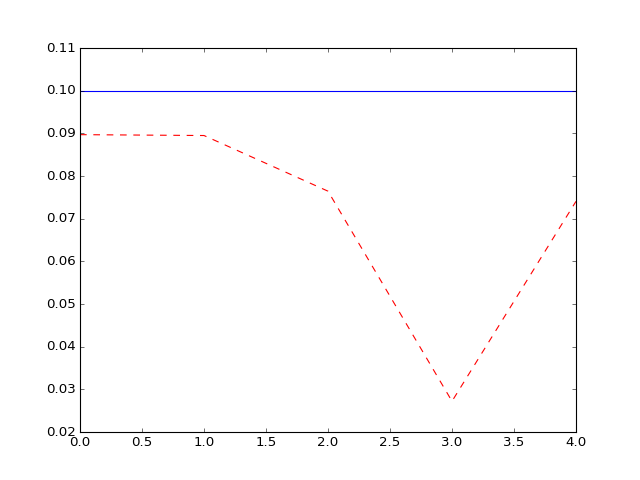

In [44]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

resp = requests.get('http://' + url + '/api/v1/type/result/nnid/' + nn_id + '/ver/1/')
data = json.loads(resp.json())
print(data)
x=range(len(data.get('labels')))
y=data.get('labels')
y_y=data.get('predicts')

plt.plot(x,y, 'b-',x, y_y,'r--')
plt.show()

# Compressed Vector 를 구해보자 
해당 Vector 의 Size 는 "n_hidden" : [200, 100, 10]에서 정의한 마지막 Layer 의 사이즈가 될 것이다. 

In [160]:
#["Class","Sex","Age","Survived","Freq"]
#"1","1st","Male","Child","No",0
resp = requests.post('http://' + url + '/api/v1/type/service/state/predict/type/anomaly/nnid/'+nn_id+'/ver/active/',
                     json={"input_data" : {"Class":1,
                                           "Sex":1,
                                           "Age":1,
                                           "Survived":1,
                                           "Freq":1} }
                     )
data = json.loads(resp.json())
print("evaluation result : {0}".format(data)) 

resp = requests.post('http://' + url + '/api/v1/type/service/state/predict/type/anomaly/nnid/'+nn_id+'/ver/active/',
                     json={"input_data" : {"Class":'1st',
                                           "Sex":'Male',
                                           "Age":'Child',
                                           "Survived":'No',
                                           "Freq":0} }
                     )
data = json.loads(resp.json())
print("evaluation result : {0}".format(data)) 

evaluation result : 0.12371374131080837
evaluation result : 0.14260566700800503
